# Exploratory Data Analysis (EDA)



# Import Library

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
import pandas as pd
import seaborn as sns
from geopy.geocoders import Bing
import numpy as np
import matplotlib.pyplot as plt
import time
import folium
import os
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.3 MB/s eta 0:00:00


# Import Data

In [ ]:
df = pd.read_csv('/content/data_fix4.csv')
df.head()

,Id,Tanggal Kejadian,Waktu Kejadian,Alamat Kejadian,Latitude,Longitude,Jenis Kendaraan R
0,1,13/1/2023,22:30:00,"JL. PH. H. MUSTOPA NO.31, KOTA BANDUNG KEL PAD...",NaN,NaN,2
1,2,21/1/2023,6:30:00,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",NaN,NaN,2
2,3,21/1/2023,6:30:00,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",NaN,NaN,2
3,4,21/1/2023,20:30:00,"JL. CIGADUNG RAYA TENGAH NO.28, KEL. CIGADUNG ...",NaN,NaN,2
4,5,25/1/2023,23:00:00,"JL. CIGADUNG RAYA TIMUR, KEL. CIGADUNG KEC. CI...",NaN,NaN,4


## Extraction Feature

In [ ]:
# Fungsi untuk membersihkan dan memformat ulang tanggal
def clean_date(date_str):
    parts = date_str.split('/')
    if len(parts) == 4:
        # Jika formatnya "DD/MM/DD/YYYY"
        day = parts[0]
        month = parts[2]  # Mengambil bagian bulan yang benar
        year = parts[3]
        return f"{day}/{month}/{year}"
    elif len(parts) == 3:
        # Jika formatnya "D/M/YYYY" atau "MM/DD/YYYY"
        day = parts[0]
        month = parts[1]
        year = parts[2]
        if int(month) > 12:  # Jika bulan lebih dari 12, anggap sebagai format "MM/DD/YYYY"
            day, month = month, day
        return f"{day}/{month}/{year}"
    return date_str

# Mengubah kolom waktu_kejadian menjadi hanya waktu
df['Waktu Kejadian'] = pd.to_datetime(df['Waktu Kejadian']).dt.time

# Terapkan fungsi pada kolom 'tanggal'
df['Tanggal Kejadian'] = df['Tanggal Kejadian'].apply(clean_date)

# Bersihkan data tidak normal: ganti '//' dengan '/'
df['Tanggal Kejadian'] = df['Tanggal Kejadian'].str.replace('//', '/')
df.head()

,Id,Tanggal Kejadian,Waktu Kejadian,Alamat Kejadian,Latitude,Longitude,Jenis Kendaraan R,jam,Tanggal,Bulan,Tahun,hari
0,1,13/01/2023,22:30:00,"JL. PH. H. MUSTOPA NO.31, KOTA BANDUNG KEL PAD...",NaN,NaN,2,22,13,1,2023,Jumat
1,2,21/01/2023,06:30:00,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",NaN,NaN,2,6,21,1,2023,Sabtu
2,3,21/01/2023,06:30:00,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",NaN,NaN,2,6,21,1,2023,Sabtu
3,4,21/01/2023,20:30:00,"JL. CIGADUNG RAYA TENGAH NO.28, KEL. CIGADUNG ...",NaN,NaN,2,20,21,1,2023,Sabtu
4,5,25/01/2023,23:00:00,"JL. CIGADUNG RAYA TIMUR, KEL. CIGADUNG KEC. CI...",NaN,NaN,4,23,25,1,2023,Rabu


# Mengubah dan Ekstrak pada Tanggal Kejadian

In [ ]:
# Ubah kolom 'tanggal' menjadi tipe datetime
df['Tanggal Kejadian'] = pd.to_datetime(df['Tanggal Kejadian'], format='%d/%m/%Y', errors='coerce')

# Ekstrak bagian tanggal, bulan, dan tahun
df['Tanggal'] = df['Tanggal Kejadian'].dt.day
df['Bulan'] = df['Tanggal Kejadian'].dt.month
df['Tahun'] = df['Tanggal Kejadian'].dt.year

# Menghilangkan bagian waktu dari format tanggal
df['Tanggal Kejadian'] = df['Tanggal Kejadian'].dt.strftime('%d/%m/%Y')

# Filter baris yang valid
df = df.dropna(subset=['Tanggal Kejadian'])

# Konversi kolom yang diekstrak menjadi tipe data int
df['Tanggal'] = df['Tanggal'].astype(int)
df['Bulan'] = df['Bulan'].astype(int)
df['Tahun'] = df['Tahun'].astype(int)
df.head()

,Id,Tanggal Kejadian,Waktu Kejadian,Alamat Kejadian,Latitude,Longitude,Jenis Kendaraan R,jam,Tanggal,Bulan,Tahun,hari
0,1,13/01/2023,22:30:00,"JL. PH. H. MUSTOPA NO.31, KOTA BANDUNG KEL PAD...",NaN,NaN,2,22,13,1,2023,Jumat
1,2,21/01/2023,06:30:00,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",NaN,NaN,2,6,21,1,2023,Sabtu
2,3,21/01/2023,06:30:00,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",NaN,NaN,2,6,21,1,2023,Sabtu
3,4,21/01/2023,20:30:00,"JL. CIGADUNG RAYA TENGAH NO.28, KEL. CIGADUNG ...",NaN,NaN,2,20,21,1,2023,Sabtu
4,5,25/01/2023,23:00:00,"JL. CIGADUNG RAYA TIMUR, KEL. CIGADUNG KEC. CI...",NaN,NaN,4,23,25,1,2023,Rabu


## Memeriksa Data

In [ ]:
# statistik deskriptif
# periksa statistik deskriptif untuk kolom numerik.
df.describe()

# cek missing values
# periksa apakah ada nilai yang hilang dalam dataset.
df.isnull().sum()

Id                     0
Tanggal Kejadian       0
Waktu Kejadian         0
Alamat Kejadian        0
Latitude             565
Longitude            565
Jenis Kendaraan R      0
jam                    0
Tanggal                0
Bulan                  0
Tahun                  0
hari                   0
dtype: int64

## Analisis Waktu
Distribusi Kejadian Berdasarkan Waktu:

Analisis frekuensi pencurian berdasarkan waktu kejadian untuk melihat jam atau hari tertentu yang lebih rawan.

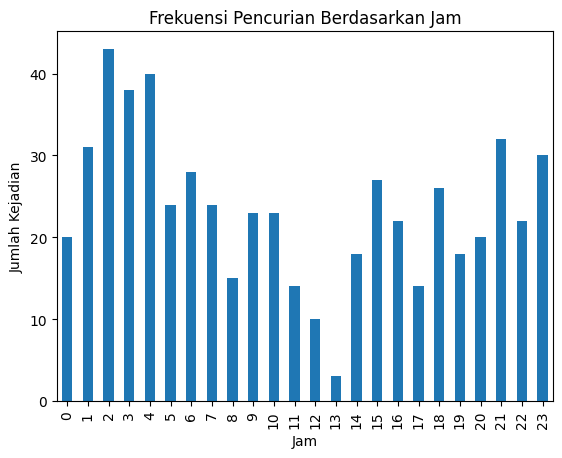

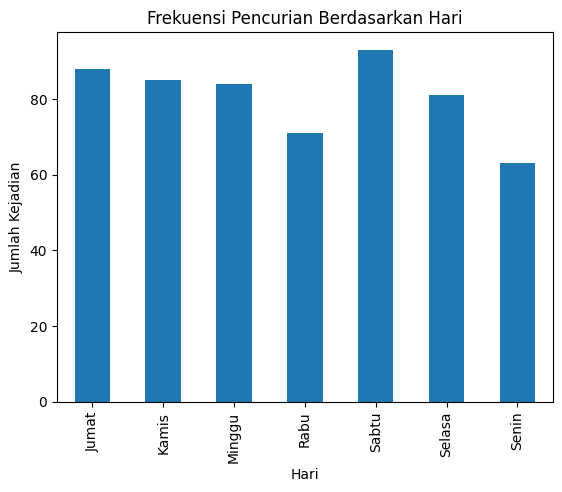

In [ ]:
import calendar
import matplotlib.pyplot as plt

df['Waktu Kejadian'] = pd.to_datetime(df['Waktu Kejadian'], format='%H:%M:%S')
df['jam'] = df['Waktu Kejadian'].dt.hour
df['hari'] = pd.to_datetime(df['Tanggal Kejadian'], format='%d/%m/%Y').dt.day_name()

# Menerjemahkan nama hari ke bahasa Indonesia
hari_indonesia = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

# Menerjemahkan nama hari ke bahasa Indonesia
df['hari'] = df['hari'].map(hari_indonesia)

# Menghitung frekuensi kejadian berdasarkan hari
hari_counts = df['hari'].value_counts().reindex(list(hari_indonesia.values()), fill_value=0)

# Membuat plot batang untuk frekuensi kejadian berdasarkan jam
df['jam'].value_counts().sort_index().plot(kind='bar')
plt.title('Frekuensi Pencurian Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Kejadian')
plt.show()

# Membuat plot batang untuk frekuensi kejadian berdasarkan hari
df['hari'].value_counts().sort_index().plot(kind='bar')
plt.title('Frekuensi Pencurian Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Kejadian')
plt.show()

Tren Musiman :

Analisis data berdasarkan bulan untuk melihat apakah ada tren musiman

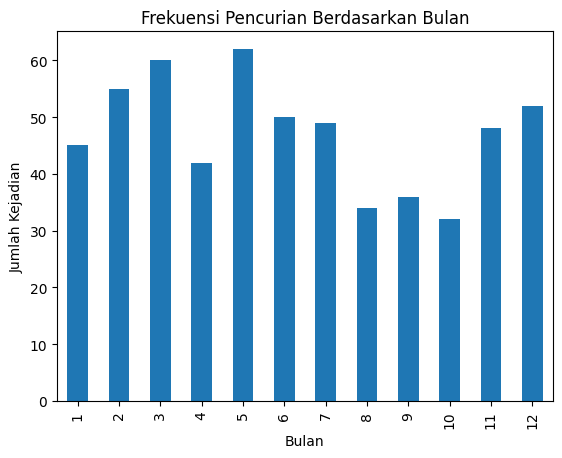

In [ ]:
df['Bulan'] = pd.to_datetime(df['Tanggal Kejadian'], format='%d/%m/%Y').dt.month
df['Bulan'].value_counts().sort_index().plot(kind='bar')
plt.title('Frekuensi Pencurian Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejadian')
plt.show()

# Export to CSV

In [ ]:
# Ekspor DataFrame hasil EDA ke file CSV
df.to_csv('hasil_eda.csv', index=False)
print("Data telah diekspor ke hasil_eda.csv")

Data telah diekspor ke hasil_eda.csv
